<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
df['ConvertedComp']

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

<AxesSubplot:ylabel='Density'>

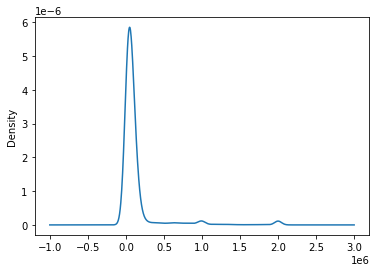

In [4]:
# your code goes here
df['ConvertedComp'].plot.density(bw_method='scott')

Plot the histogram for the column `ConvertedComp`.


In [5]:
df['ConvertedComp'].head()

0     61000.0
1     95179.0
2     90000.0
3    455352.0
4     65277.0
Name: ConvertedComp, dtype: float64

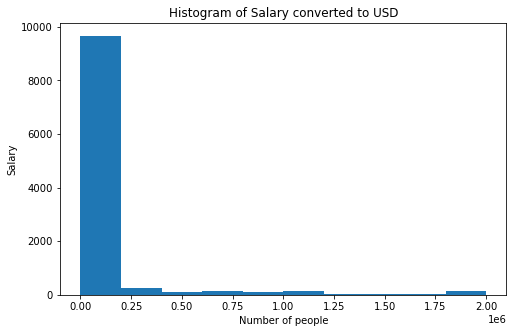

In [6]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Salary converted to USD')
plt.ylabel('Salary')
plt.xlabel('Number of people')

plt.show()

What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [8]:
# your code goes here
df['Gender'].describe()

count     11325
unique        7
top         Man
freq      10480
Name: Gender, dtype: object

In [9]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [10]:
man_df = df[df['Gender']=='Man']
man_df['Gender'].count()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
woman_df=df[df['Gender']=='Woman']
woman_df["ConvertedComp"].median()

57708.0

In [12]:
# your code goes here


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [13]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [38]:
df['Age'].median()

29.0

Plot a histogram of the column `Age`.


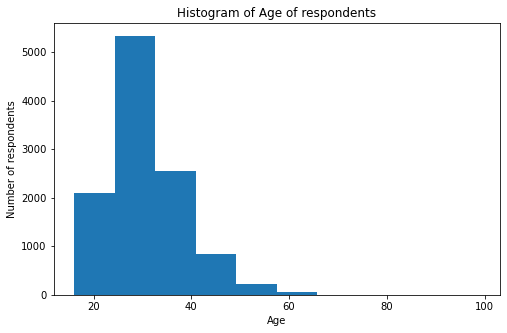

In [14]:
df['Age'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Age of respondents')
plt.ylabel('Number of respondents')
plt.xlabel('Age')

plt.show()

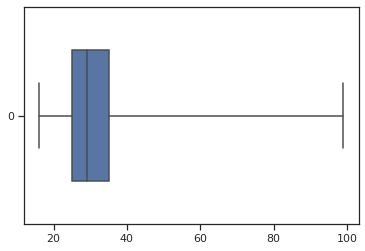

In [47]:
sns.set_theme(style="ticks")
df_age = df['Age']
ax = sns.boxplot(data=df_age, whis=[0, 100], width= .6, orient='h')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [15]:
df_converted = df[['ConvertedComp']]
df_converted.head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


In [16]:
df_converted.describe()

,ConvertedComp
count,1.058200e+04
mean,1.315967e+05
std,2.947865e+05
min,0.000000e+00
25%,2.686800e+04
50%,5.774500e+04
75%,1.000000e+05
max,2.000000e+06


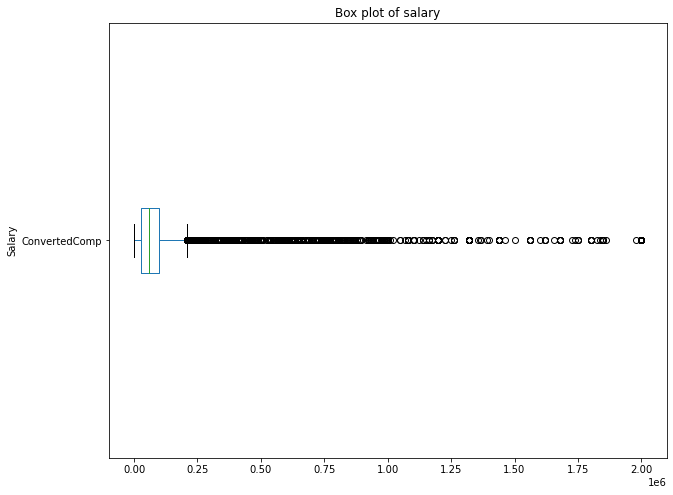

In [17]:
# your code goes here

df_converted.plot(kind='box', figsize=(10, 8), vert=False)

plt.title('Box plot of salary')
plt.ylabel('Salary')

plt.show()

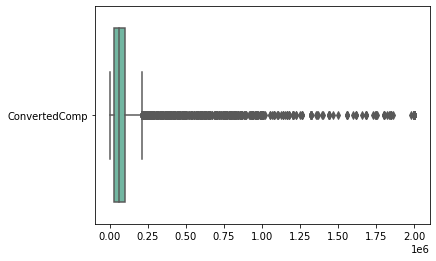

In [18]:
ax = sns.boxplot(data=df_converted, orient='h', palette='Set2')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [19]:
df['ConvertedComp'].dropna(inplace=True)
Q3 = df['ConvertedComp'].quantile(0.75)
Q1 = df['ConvertedComp'].quantile(0.25)
IQR = Q3 - Q1
print(f"The interquartile range is {IQR}.")

The interquartile range is 73132.0.


Find out the upper and lower bounds.


In [20]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"The upper and lower bounds are, respectively, {upper_bound} and {lower_bound}.")

The upper and lower bounds are, respectively, 209698.0 and -82830.0.


In [21]:
def tukeys_method(df_converted, ConvertedComp):
    q1 = df_converted['ConvertedComp'].quantile(0.25)
    q3 = df_converted['ConvertedComp'].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr

     #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
   
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df_converted['ConvertedComp']):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df_converted['ConvertedComp']):
        if x <= inner_fence_le or x >= inner_fence_le:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "CRIM")


In [22]:
print(len(probable_outliers_tm))

735


In [23]:
print(len((possible_outliers_tm)))

10582


Identify how many outliers are there in the `ConvertedComp` column.


In [24]:
df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].ConvertedComp.count()


879

In [25]:
def determine_outlier_thresholds_std(df_converted, ConvertedComp):
    upper_boundary = df_converted['ConvertedComp'].mean() + 3 * df_converted['ConvertedComp'].std()
    lower_boundary = df_converted['ConvertedComp'].mean() - 3 * df_converted['ConvertedComp'].std()
    return lower_boundary, upper_boundary

In [26]:
def check_outliers_std(df_converted, ConvertedComp):
    lower_boundary, upper_boundary = determine_outlier_thresholds_std(df_converted, ConvertedComp)
    if df_converted[(df_converted['ConvertedComp'] > upper_boundary) | (df_converted['ConvertedComp'] < lower_boundary)].any(axis=None):
        return True
    else: 
        return False

def replace_with_thresholds_std(df_converted, cols, replace=False):
    from tabulate import tabulate
    data = []
    for ConvertedComp in cols:
        if ConvertedComp != 'Outcome':
            outliers_ = check_outliers_std(df_converted, ConvertedComp)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_std(df_converted, ConvertedComp)
            if outliers_:
                count = df_converted[(df_converted['ConvertedComp'] > upper_limit) | (df_converted['ConvertedComp'] < lower_limit)]['ConvertedComp'].count()
                if replace:
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        df_converted.loc[(df_converted['ConvertedComp'] > upper_limit), 'ConvertedComp'] = upper_limit
                    else:
                        df_converted.loc[(df_converted['ConvertedComp'] < lower_limit), 'ConvertedComp'] = lower_limit
                        df_converted.loc[(df_converted['ConvertedComp'] > upper_limit), 'ConvertedComp'] = upper_limit
            outliers_status = check_outliers_std(df_converted, ConvertedComp)
            data.append([outliers_, outliers_status,count, ConvertedComp, lower_limit, upper_limit])
    table = tabulate(data, headers=['Outlier (Previously)','Outliers','Count', 'Column','Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using 3 Standard Deviation")
    print(table)

replace_with_thresholds_std(df_converted, df.columns,replace=False)

Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ======================  =============  =============
Outlier (Previously)    Outliers      Count  Column                    Lower Limit    Upper Limit
======================  ==========  =======  ======================  =============  =============
True                    True            240  Respondent                    -752763    1.01596e+06
True                    True            240  MainBranch                    -752763    1.01596e+06
True                    True            240  Hobbyist                      -752763    1.01596e+06
True                    True            240  OpenSourcer                   -752763    1.01596e+06
True                    True            240  OpenSource                    -752763    1.01596e+06
True                    True            240  Employment                    -752763    1.01596e+06
True                    True            240  Country                     

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [27]:
q = df_converted["ConvertedComp"].quantile(0.99)
df_converted[df_converted["ConvertedComp"] < q]
q_low = df_converted["ConvertedComp"].quantile(0.01)
q_hi  = df_converted["ConvertedComp"].quantile(0.99)

df_filtered = df_converted[(df_converted["ConvertedComp"] < q_hi) & (df_converted["ConvertedComp"] > q_low)]

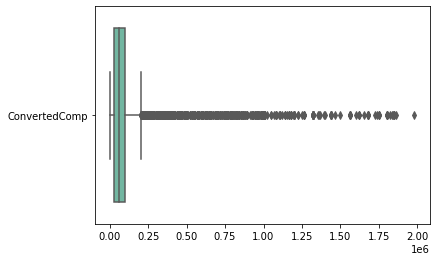

In [28]:
ax1 = sns.boxplot(data=df_filtered, orient='h', palette='Set2')

In [29]:
df['ConvertedComp'].dropna(inplace=True)
first_Quartile,third_Quartile=df['ConvertedComp'].quantile(.25),df['ConvertedComp'].quantile(.75)

IQR = third_Quartile - first_Quartile
print(IQR)

73132.0


In [30]:
lower_limit = first_Quartile - 1.5 * IQR
upper_limit = third_Quartile + 1.5 * IQR

print('lower bounds: ' + str(lower_limit))
print('upper bounds: ' + str(upper_limit))

lower bounds: -82830.0
upper bounds: 209698.0


In [31]:
df[(df['ConvertedComp'] <  lower_limit) | (df['ConvertedComp'] > upper_limit)].ConvertedComp.count()

879

In [33]:
new_df = df[(df['ConvertedComp'] > lower_limit) & (df['ConvertedComp'] < upper_limit)] 

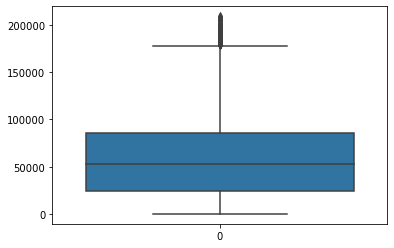

In [34]:
ax2 = sns.boxplot(data=new_df['ConvertedComp'])

In [39]:
new_df['ConvertedComp'].median()

52704.0

In [48]:
new_df['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [37]:
# your code goes here
new_df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
